In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
%matplotlib inline
import seaborn
import warnings
warnings.filterwarnings("ignore")

# yahoo finance is used to fetch data
import yfinance as yf

from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

# Creating  a linear regression model
from sklearn.linear_model import LinearRegression

from pmdarima import auto_arima

In [4]:
aapl = yf.download('AAPL','2010-01-01','2021-10-11')

[*********************100%***********************]  1 of 1 completed


In [5]:
aapl.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2009-12-31,7.611786,7.619643,7.520000,7.526071,6.462008,352410800
2010-01-04,7.622500,7.660714,7.585000,7.643214,6.562590,493729600
2010-01-05,7.664286,7.699643,7.616071,7.656429,6.573933,601904800
2010-01-06,7.656429,7.686786,7.526786,7.534643,6.469369,552160000
2010-01-07,7.562500,7.571429,7.466071,7.520714,6.457407,477131200


In [9]:
!pip install quandl

In [17]:
import quandl 
aapl = quandl.get("WIKI/AAPL", start_date="2006-10-01", end_date="2021-01-01")
aapl.head()

,Open,High,Low,Close,Volume,Ex-Dividend,Split Ratio,Adj. Open,Adj. High,Adj. Low,Adj. Close,Adj. Volume
Date,,,,,,,,,,,,
2006-10-02,75.10,75.870,74.30,74.86,25451400.0,0.0,1.0,9.651397,9.750352,9.548586,9.620553,178159800.0
2006-10-03,74.45,74.950,73.19,74.07,28239600.0,0.0,1.0,9.567863,9.632120,9.405935,9.519027,197677200.0
2006-10-04,74.10,75.462,73.16,75.38,29610100.0,0.0,1.0,9.522883,9.697919,9.402080,9.687381,207270700.0
2006-10-05,74.53,76.160,74.13,74.83,24424400.0,0.0,1.0,9.578144,9.787621,9.526738,9.616698,170970800.0
2006-10-06,74.42,75.040,73.81,74.22,16677100.0,0.0,1.0,9.564007,9.643686,9.485614,9.538304,116739700.0


In [18]:
# Inspect the index 
aapl.index

# Inspect the columns
aapl.columns

# Select only the last 10 observations of `Close`
ts = aapl['Close'][-10:]

# Check the type of `ts` 
type(ts)

pandas.core.series.Series

In [19]:
# Inspect the first rows of November-December 2006
print(aapl.loc[pd.Timestamp('2006-11-01'):pd.Timestamp('2006-12-31')].head())

# Inspect the first rows of 2007 
print(aapl.loc['2007'].head())

# Inspect November 2006
print(aapl.iloc[22:43])

# Inspect the 'Open' and 'Close' values at 2006-11-01 and 2006-12-01
print(aapl.iloc[[22,43], [0, 3]])

              Open   High    Low  Close      Volume  Ex-Dividend  Split Ratio  \
Date                                                                            
2006-11-01  81.100  81.38  78.36  79.16  21828300.0          0.0          1.0   
2006-11-02  78.915  79.32  78.50  78.98  16624400.0          0.0          1.0   
2006-11-03  79.360  79.53  77.79  78.29  15424600.0          0.0          1.0   
2006-11-06  78.950  80.06  78.43  79.71  15520600.0          0.0          1.0   
2006-11-07  80.450  81.00  80.13  80.51  18783300.0          0.0          1.0   

            Adj. Open  Adj. High   Adj. Low  Adj. Close  Adj. Volume  
Date                                                                  
2006-11-01  10.422480  10.458464  10.070352   10.173163  152798100.0  
2006-11-02  10.141677  10.193726  10.088344   10.150031  116370800.0  
2006-11-03  10.198866  10.220713   9.997099   10.061356  107972200.0  
2006-11-06  10.146175  10.288826  10.079348   10.243846  108644200.0  
2006-1

In [20]:


# Sample 20 rows
sample = aapl.sample(20)

# Print `sample`
print(sample)

               Open      High       Low    Close       Volume  Ex-Dividend  \
Date                                                                         
2013-12-20  545.430  551.6100  544.8175  549.020   15586200.0         0.00   
2013-01-04  536.965  538.6299  525.8286  527.000   21226200.0         0.00   
2017-11-14  173.040  173.4800  171.1800  171.340   23588451.0         0.00   
2015-08-06  115.970  116.5000  114.1150  115.130   52903040.0         0.52   
2016-01-27   96.040   96.6289   93.3400   93.420  133369674.0         0.00   
2009-11-04  190.730  193.8500  190.2300  190.810   17411800.0         0.00   
2007-12-04  177.150  180.9000  176.9900  179.810   27635700.0         0.00   
2012-11-28  577.270  585.8000  572.2600  582.940   18602300.0         0.00   
2017-08-01  149.100  150.2200  148.4100  150.050   24725526.0         0.00   
2014-04-22  528.310  531.8260  526.5010  531.699    7234400.0         0.00   
2008-02-14  129.400  130.8000  127.0100  127.460   34074900.0   

In [21]:
# Resample to monthly level 
monthly_aapl = aapl.resample('M')

# Print `monthly_aapl`
print(monthly_aapl)

DatetimeIndexResampler [freq=<MonthEnd>, axis=0, closed=right, label=right, convention=start, origin=start_day]


In [22]:
# Add a column `diff` to `aapl` 
aapl['diff'] = aapl.Open - aapl.Close

# Delete the new `diff` column
del aapl['diff']

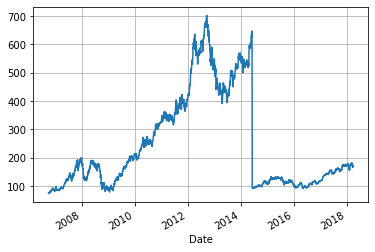

In [23]:
# Import Matplotlib's `pyplot` module as `plt`
import matplotlib.pyplot as plt

# Plot the closing prices for `aapl`
aapl['Close'].plot(grid=True)

# Show the plot
plt.show()

In [26]:
aapl.head()

,Open,High,Low,Close,Volume,Ex-Dividend,Split Ratio,Adj. Open,Adj. High,Adj. Low,Adj. Close,Adj. Volume
Date,,,,,,,,,,,,
2006-10-02,75.10,75.870,74.30,74.86,25451400.0,0.0,1.0,9.651397,9.750352,9.548586,9.620553,178159800.0
2006-10-03,74.45,74.950,73.19,74.07,28239600.0,0.0,1.0,9.567863,9.632120,9.405935,9.519027,197677200.0
2006-10-04,74.10,75.462,73.16,75.38,29610100.0,0.0,1.0,9.522883,9.697919,9.402080,9.687381,207270700.0
2006-10-05,74.53,76.160,74.13,74.83,24424400.0,0.0,1.0,9.578144,9.787621,9.526738,9.616698,170970800.0
2006-10-06,74.42,75.040,73.81,74.22,16677100.0,0.0,1.0,9.564007,9.643686,9.485614,9.538304,116739700.0


In [27]:
# Assign `Adj Close` to `daily_close`
daily_close = aapl['Adj. Close']

# Daily returns
daily_pct_c = daily_close.pct_change()

# Replace NA values with 0
daily_pct_c.fillna(0, inplace=True)

# Inspect daily returns
print(daily_pct_c)


Date
2006-10-02    0.000000
2006-10-03   -0.010553
2006-10-04    0.017686
2006-10-05   -0.007296
2006-10-06   -0.008152
                ...   
2018-03-21   -0.022655
2018-03-22   -0.014159
2018-03-23   -0.023128
2018-03-26    0.047472
2018-03-27   -0.025641
Name: Adj. Close, Length: 2889, dtype: float64


In [29]:

# Daily log returns
daily_log_returns = np.log(daily_close.pct_change()+1)

daily_log_returns.fillna(0, inplace=True)

# Print daily log returns
print(daily_log_returns)

Date
2006-10-02    0.000000
2006-10-03   -0.010609
2006-10-04    0.017531
2006-10-05   -0.007323
2006-10-06   -0.008185
                ...   
2018-03-21   -0.022915
2018-03-22   -0.014260
2018-03-23   -0.023399
2018-03-26    0.046379
2018-03-27   -0.025975
Name: Adj. Close, Length: 2889, dtype: float64


In [30]:


# Resample `aapl` to business months, take last observation as value 
monthly = aapl.resample('BM').apply(lambda x: x[-1])

# Calculate the monthly percentage change
monthly.pct_change()

,Open,High,Low,Close,Volume,Ex-Dividend,Split Ratio,Adj. Open,Adj. High,Adj. Low,Adj. Close,Adj. Volume
Date,,,,,,,,,,,,
2006-10-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2006-11-30,0.132167,0.134672,0.134987,0.130488,0.735854,NaN,0.0,0.132167,0.134672,0.134987,0.130488,0.735854
2006-12-29,-0.089628,-0.078550,-0.084560,-0.074405,0.236584,NaN,0.0,-0.089628,-0.078550,-0.084560,-0.074405,0.236584
2007-01-31,0.010840,0.007026,0.011876,0.010490,-0.204714,NaN,0.0,0.010840,0.007026,0.011876,0.010490,-0.204714
2007-02-28,-0.021918,-0.004651,-0.016005,-0.013064,0.074066,NaN,0.0,-0.021918,-0.004651,-0.016005,-0.013064,0.074066
...,...,...,...,...,...,...,...,...,...,...,...,...
2017-11-30,0.015068,0.014678,0.008985,0.016623,0.132424,NaN,0.0,0.015068,0.014678,0.008985,0.016623,0.132424
2017-12-29,0.000528,-0.009004,0.004631,-0.015246,-0.361658,NaN,0.0,0.000528,-0.009004,0.004631,-0.015246,-0.361658
2018-01-31,-0.021405,-0.012593,-0.016074,-0.010636,0.208253,NaN,0.0,-0.021405,-0.012593,-0.016074,-0.010636,0.208253


In [31]:
# Resample `aapl` to quarters, take the mean as value per quarter
quarter = aapl.resample("4M").mean()

# Calculate the quarterly percentage change
quarter.pct_change()

,Open,High,Low,Close,Volume,Ex-Dividend,Split Ratio,Adj. Open,Adj. High,Adj. Low,Adj. Close,Adj. Volume
Date,,,,,,,,,,,,
2006-10-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2007-02-28,0.125782,0.124336,0.121461,0.122890,0.369611,NaN,0.000000,0.125782,0.124336,0.121461,0.122890,0.369611
2007-06-30,0.196028,0.195413,0.198331,0.197710,-0.080296,NaN,0.000000,0.196028,0.195413,0.198331,0.197710,-0.080296
2007-10-31,0.400986,0.404614,0.392010,0.400796,0.306882,NaN,0.000000,0.400986,0.404614,0.392010,0.400796,0.306882
2008-02-29,0.127085,0.131274,0.117746,0.120394,0.172293,NaN,0.000000,0.127085,0.131274,0.117746,0.120394,0.172293
2008-06-30,-0.003844,-0.004781,0.005927,0.003673,-0.209762,NaN,0.000000,-0.003844,-0.004781,0.005927,0.003673,-0.209762
2008-10-31,-0.114295,-0.108566,-0.124619,-0.118803,0.133219,NaN,0.000000,-0.114295,-0.108566,-0.124619,-0.118803,0.133219
2009-02-28,-0.363319,-0.363614,-0.359304,-0.360865,-0.161601,NaN,0.000000,-0.363319,-0.363614,-0.359304,-0.360865,-0.161601
2009-06-30,0.311992,0.304360,0.324701,0.316630,-0.386935,NaN,0.000000,0.311992,0.304360,0.324701,0.316630,-0.386935


In [32]:
# Daily returns
daily_pct_c = daily_close / daily_close.shift(1) - 1

# Print `daily_pct_c`
print(daily_pct_c)

Date
2006-10-02         NaN
2006-10-03   -0.010553
2006-10-04    0.017686
2006-10-05   -0.007296
2006-10-06   -0.008152
                ...   
2018-03-21   -0.022655
2018-03-22   -0.014159
2018-03-23   -0.023128
2018-03-26    0.047472
2018-03-27   -0.025641
Name: Adj. Close, Length: 2889, dtype: float64


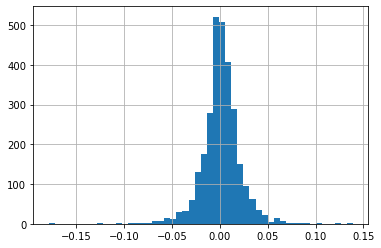

count    2888.000000
mean        0.001191
std         0.019942
min        -0.179195
25%        -0.007963
50%         0.000950
75%         0.011228
max         0.139050
Name: Adj. Close, dtype: float64


In [33]:
# Import matplotlib
import matplotlib.pyplot as plt

# Plot the distribution of `daily_pct_c`
daily_pct_c.hist(bins=50)

# Show the plot
plt.show()

# Pull up summary statistics
print(daily_pct_c.describe())

In [34]:
# Calculate the cumulative daily returns
cum_daily_return = (1 + daily_pct_c).cumprod()

# Print `cum_daily_return`
print(cum_daily_return)

Date
2006-10-02          NaN
2006-10-03     0.989447
2006-10-04     1.006946
2006-10-05     0.999599
2006-10-06     0.991451
                ...    
2018-03-21    17.802510
2018-03-22    17.550446
2018-03-23    17.144544
2018-03-26    17.958426
2018-03-27    17.497954
Name: Adj. Close, Length: 2889, dtype: float64


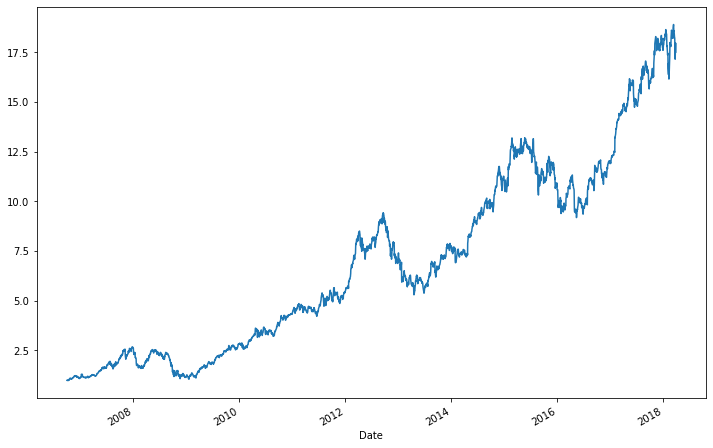

In [35]:


# Import matplotlib
import matplotlib.pyplot as plt 

# Plot the cumulative daily returns
cum_daily_return.plot(figsize=(12,8))

# Show the plot
plt.show()



In [36]:


# Resample the cumulative daily return to cumulative monthly return 
cum_monthly_return = cum_daily_return.resample("M").mean()

# Print the `cum_monthly_return`
print(cum_monthly_return)



Date
2006-10-31     1.031704
2006-11-30     1.140058
2006-12-31     1.155110
2007-01-31     1.187303
2007-02-28     1.145275
                ...    
2017-11-30    17.900685
2017-12-31    17.867278
2018-01-31    18.086822
2018-02-28    17.429214
2018-03-31    18.218424
Freq: M, Name: Adj. Close, Length: 138, dtype: float64


In [37]:
def get(tickers, startdate, enddate):
    def data(ticker):
        return (yf.download(ticker, start=startdate, end=enddate))
    datas = map (data, tickers)
    return(pd.concat(datas, keys=tickers, names=['Ticker', 'Date']))

In [38]:
tickers = ['AAPL', 'MSFT', 'IBM', 'GOOG']
all_data = get(tickers, datetime.datetime(2006, 10, 1), datetime.datetime(2012, 1, 1))
all_data.head()

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


Open      High       Low     Close  Adj Close  \
Ticker Date                                                            
AAPL   2006-10-02  2.682143  2.709643  2.653571  2.673571   2.295572   
       2006-10-03  2.658929  2.676786  2.613929  2.645714   2.271653   
       2006-10-04  2.646429  2.695000  2.612857  2.692143   2.311517   
       2006-10-05  2.661786  2.720000  2.647500  2.672500   2.294652   
       2006-10-06  2.657857  2.680000  2.636071  2.650714   2.275946   

                      Volume  
Ticker Date                   
AAPL   2006-10-02  712639200  
       2006-10-03  790708800  
       2006-10-04  829082800  
       2006-10-05  683883200  
       2006-10-06  466958800

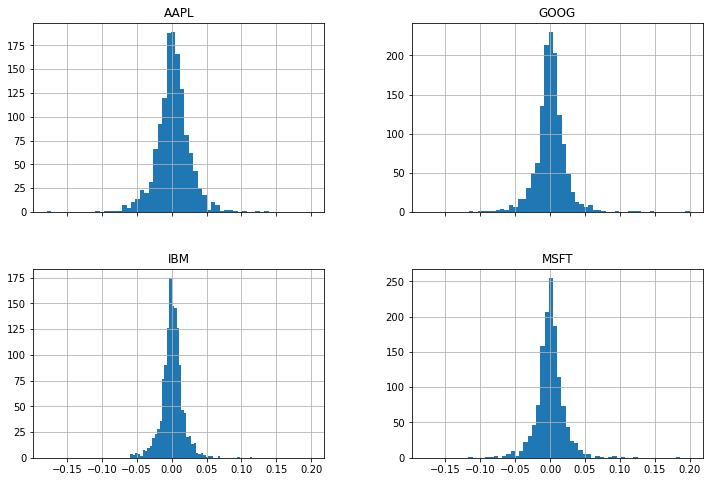

In [40]:
daily_close_px = all_data[['Adj Close']].reset_index().pivot('Date', 'Ticker', 'Adj Close')

# Calculate the daily percentage change for `daily_close_px`
daily_pct_change = daily_close_px.pct_change()

# Plot the distributions
daily_pct_change.hist(bins=50, sharex=True, figsize=(12,8))

# Show the resulting plot
plt.show()

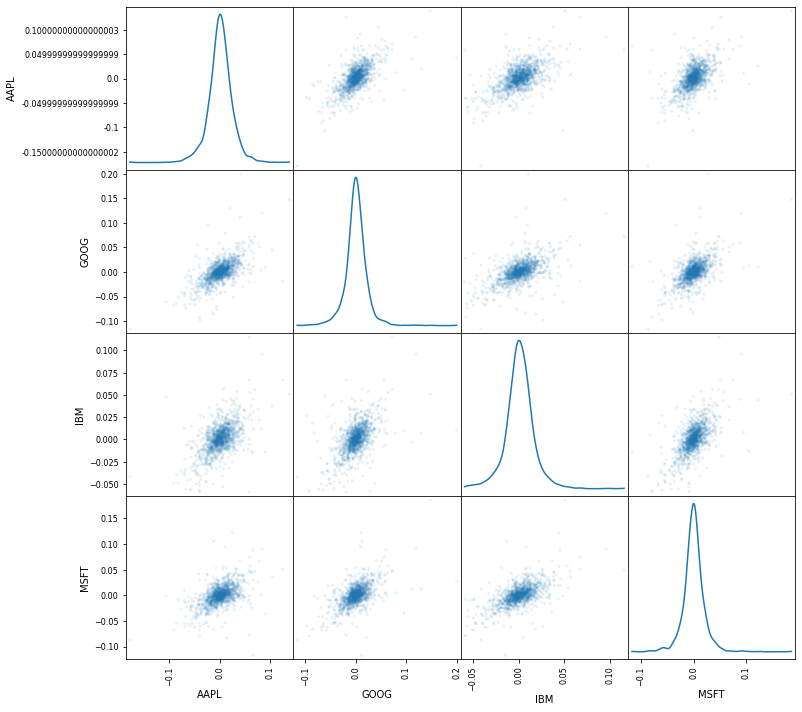

In [41]:
# Plot a scatter matrix with the `daily_pct_change` data 
pd.plotting.scatter_matrix(daily_pct_change, diagonal='kde', alpha=0.1,figsize=(12,12))

# Show the plot
plt.show()

In [43]:
# Isolate the adjusted closing prices 
adj_close_px = aapl['Adj. Close']

# Calculate the moving average
moving_avg = adj_close_px.rolling(window=40).mean()

# Inspect the result
moving_avg[-10:]

Date
2018-03-14    171.818375
2018-03-15    171.807125
2018-03-16    171.776125
2018-03-19    171.697125
2018-03-20    171.653125
2018-03-21    171.508875
2018-03-22    171.374500
2018-03-23    171.220250
2018-03-26    171.251750
2018-03-27    171.261250
Name: Adj. Close, dtype: float64

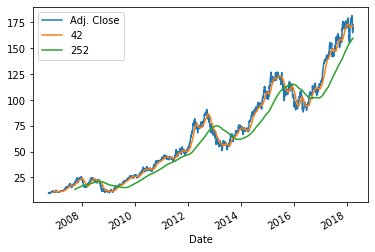

In [45]:
# Short moving window rolling mean
aapl['42'] = adj_close_px.rolling(window=40).mean()

# Long moving window rolling mean
aapl['252'] = adj_close_px.rolling(window=252).mean()

# Plot the adjusted closing price, the short and long windows of rolling means
aapl[['Adj. Close', '42', '252']].plot()

plt.show()

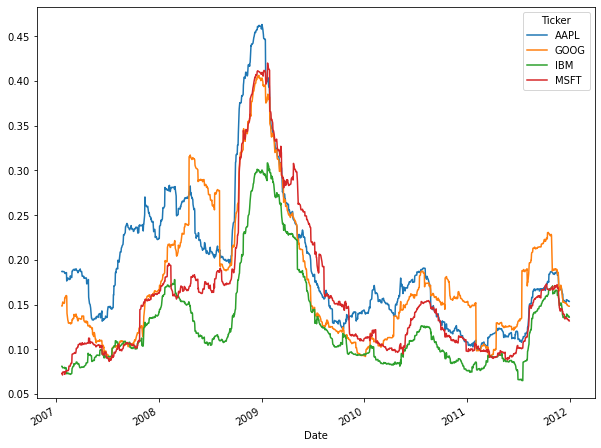

In [46]:


# Define the minumum of periods to consider 
min_periods = 75 

# Calculate the volatility
vol = daily_pct_change.rolling(min_periods).std() * np.sqrt(min_periods) 

# Plot the volatility
vol.plot(figsize=(10, 8))

# Show the plot
plt.show()



In [52]:

# Isolate the adjusted closing price
all_adj_close = all_data[['Adj Close']]

# Calculate the returns 
all_returns = np.log(all_adj_close / all_adj_close.shift(1))

# Isolate the AAPL returns 
aapl_returns = all_returns.iloc[all_returns.index.get_level_values('Ticker') == 'AAPL']
aapl_returns.index = aapl_returns.index.droplevel('Ticker')

# Isolate the MSFT returns
msft_returns = all_returns.iloc[all_returns.index.get_level_values('Ticker') == 'MSFT']
msft_returns.index = msft_returns.index.droplevel('Ticker')

# Build up a new DataFrame with AAPL and MSFT returns
return_data = pd.concat([aapl_returns, msft_returns], axis=1)[1:]
return_data.columns = ['AAPL', 'MSFT']

# Add a constant 
X = sm.add_constant(return_data['AAPL'])

# Construct the model
model = sm.OLS(return_data['MSFT'],X).fit()

# Print the summary
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                   MSFT   R-squared:                       0.281
Model:                            OLS   Adj. R-squared:                  0.280
Method:                 Least Squares   F-statistic:                     515.5
Date:                Thu, 14 Oct 2021   Prob (F-statistic):           1.33e-96
Time:                        21:26:14   Log-Likelihood:                 3514.0
No. Observations:                1322   AIC:                            -7024.
Df Residuals:                    1320   BIC:                            -7014.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0005      0.000     -1.119      0.2

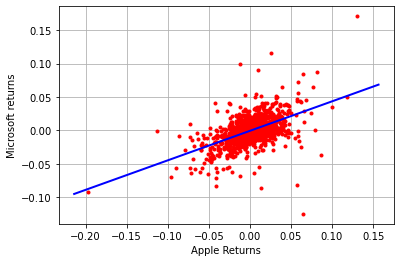

In [53]:


plt.plot(return_data['AAPL'], return_data['MSFT'], 'r.')

ax = plt.axis()
x = np.linspace(ax[0], ax[1] + 0.01)

plt.plot(x, model.params[0] + model.params[1] * x, 'b', lw=2)

plt.grid(True)
plt.axis('tight')
plt.xlabel('Apple Returns')
plt.ylabel('Microsoft returns')

plt.show()



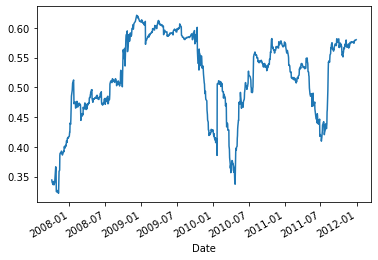

In [54]:
return_data['MSFT'].rolling(window=252).corr(return_data['AAPL']).plot()
plt.show()

In [55]:
# Initialize the short and long windows
short_window = 40
long_window = 100



In [57]:
# Initialize the `signals` DataFrame with the `signal` column
signals = pd.DataFrame(index=aapl.index)
signals['signal'] = 0.0
signals.head()


,signal
Date,
2018-03-21,0.0
2018-03-22,0.0
2018-03-23,0.0
2018-03-26,0.0
2018-03-27,0.0


In [58]:
signals.tail()

,signal
Date,
2018-03-21,0.0
2018-03-22,0.0
2018-03-23,0.0
2018-03-26,0.0
2018-03-27,0.0


In [100]:
signals.shape

(2889, 4)

In [59]:

# Create short simple moving average over the short window
signals['short_mavg'] = aapl['Close'].rolling(window=short_window, min_periods=1, center=False).mean()

signals.head(20)

,signal,short_mavg
Date,,
2006-10-02,0.0,74.860000
2006-10-03,0.0,74.465000
2006-10-04,0.0,74.770000
2006-10-05,0.0,74.785000
2006-10-06,0.0,74.672000
2006-10-09,0.0,74.665000
2006-10-10,0.0,74.542857
2006-10-11,0.0,74.378750
2006-10-12,0.0,74.476667


In [60]:

# Create long simple moving average over the long window
signals['long_mavg'] = aapl['Close'].rolling(window=long_window, min_periods=1, center=False).mean()

signals.head(10)

,signal,short_mavg,long_mavg
Date,,,
2006-10-02,0.0,74.860000,74.860000
2006-10-03,0.0,74.465000,74.465000
2006-10-04,0.0,74.770000,74.770000
2006-10-05,0.0,74.785000,74.785000
2006-10-06,0.0,74.672000,74.672000
2006-10-09,0.0,74.665000,74.665000
2006-10-10,0.0,74.542857,74.542857
2006-10-11,0.0,74.378750,74.378750
2006-10-12,0.0,74.476667,74.476667


In [62]:
# Create signals
signals['signal'][short_window:] = np.where(signals['short_mavg'][short_window:] 
                                            > signals['long_mavg'][short_window:], 1.0, 0.0)   


In [63]:
signals.head(20)

,signal,short_mavg,long_mavg
Date,,,
2006-10-02,0.0,74.860000,74.860000
2006-10-03,0.0,74.465000,74.465000
2006-10-04,0.0,74.770000,74.770000
2006-10-05,0.0,74.785000,74.785000
2006-10-06,0.0,74.672000,74.672000
2006-10-09,0.0,74.665000,74.665000
2006-10-10,0.0,74.542857,74.542857
2006-10-11,0.0,74.378750,74.378750
2006-10-12,0.0,74.476667,74.476667


In [99]:
signals['signal'][short_window:].shape

(2849,)

In [64]:
# Generate trading orders
signals['positions'] = signals['signal'].diff()

In [69]:
signals.tail(100)

,signal,short_mavg,long_mavg,positions
Date,,,,
2017-10-31,1.0,157.446395,154.136358,0.0
2017-11-01,1.0,157.570895,154.315458,0.0
2017-11-02,1.0,157.742145,154.543358,0.0
2017-11-03,1.0,158.088895,154.802458,0.0
2017-11-06,1.0,158.407645,155.093358,0.0
...,...,...,...,...
2018-03-21,0.0,171.508875,171.900420,0.0
2018-03-22,0.0,171.374500,172.024820,0.0
2018-03-23,0.0,171.220250,172.100120,0.0


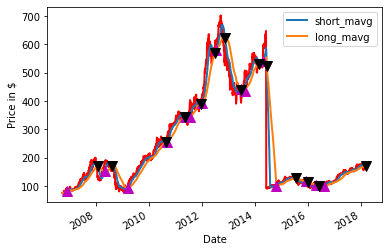

In [68]:
# Initialize the plot figure
fig = plt.figure()

# Add a subplot and label for y-axis
ax1 = fig.add_subplot(111,  ylabel='Price in $')

# Plot the closing price
aapl['Close'].plot(ax=ax1, color='r', lw=2.)

# Plot the short and long moving averages
signals[['short_mavg', 'long_mavg']].plot(ax=ax1, lw=2.)

# Plot the buy signals
ax1.plot(signals.loc[signals.positions == 1.0].index, 
         signals.short_mavg[signals.positions == 1.0],
         '^', markersize=10, color='m')
         
# Plot the sell signals
ax1.plot(signals.loc[signals.positions == -1.0].index, 
         signals.short_mavg[signals.positions == -1.0],
         'v', markersize=10, color='k')
         
# Show the plot
plt.show()

In [70]:
# Set the initial capital
initial_capital= float(100000.0)

In [71]:
# Create a DataFrame `positions`
positions = pd.DataFrame(index=signals.index).fillna(0.0)

In [72]:
# Buy a 100 shares
positions['AAPL'] = 100*signals['signal']  

In [75]:
positions.tail(10)

,AAPL
Date,
2018-03-14,100.0
2018-03-15,100.0
2018-03-16,100.0
2018-03-19,100.0
2018-03-20,0.0
2018-03-21,0.0
2018-03-22,0.0
2018-03-23,0.0
2018-03-26,0.0


In [77]:
# Initialize the portfolio with value owned   
portfolio = positions.multiply(aapl['Adj. Close'], axis=0)

In [79]:
portfolio.tail(40)

,AAPL
Date,
2018-01-30,16697.0
2018-01-31,16743.0
2018-02-01,16778.0
2018-02-02,16037.0
2018-02-05,15749.0
2018-02-06,16303.0
2018-02-07,15954.0
2018-02-08,15532.0
2018-02-09,15597.0


In [81]:

# Store the difference in shares owned 
pos_diff = positions.diff()
pos_diff.tail(20)

,AAPL
Date,
2018-02-28,0.0
2018-03-01,0.0
2018-03-02,0.0
2018-03-05,0.0
2018-03-06,0.0
2018-03-07,0.0
2018-03-08,0.0
2018-03-09,0.0
2018-03-12,0.0


In [83]:
# Add `holdings` to portfolio
portfolio['holdings'] = (positions.multiply(aapl['Adj. Close'], axis=0)).sum(axis=1)
portfolio.tail(20)

,AAPL,holdings
Date,,
2018-02-28,17812.0,17812.0
2018-03-01,17500.0,17500.0
2018-03-02,17621.0,17621.0
2018-03-05,17682.0,17682.0
2018-03-06,17667.0,17667.0
2018-03-07,17503.0,17503.0
2018-03-08,17694.0,17694.0
2018-03-09,17998.0,17998.0
2018-03-12,18172.0,18172.0


In [84]:

# Add `cash` to portfolio
portfolio['cash'] = initial_capital - (pos_diff.multiply(aapl['Adj. Close'], axis=0)).sum(axis=1).cumsum()  
portfolio.tail(20)

,AAPL,holdings,cash
Date,,,
2018-02-28,17812.0,17812.0,93447.536453
2018-03-01,17500.0,17500.0,93447.536453
2018-03-02,17621.0,17621.0,93447.536453
2018-03-05,17682.0,17682.0,93447.536453
2018-03-06,17667.0,17667.0,93447.536453
2018-03-07,17503.0,17503.0,93447.536453
2018-03-08,17694.0,17694.0,93447.536453
2018-03-09,17998.0,17998.0,93447.536453
2018-03-12,18172.0,18172.0,93447.536453


In [86]:
# Add `total` to portfolio
portfolio['total'] = portfolio['cash'] + portfolio['holdings']

In [87]:
portfolio.tail(20)

,AAPL,holdings,cash,total
Date,,,,
2018-02-28,17812.0,17812.0,93447.536453,111259.536453
2018-03-01,17500.0,17500.0,93447.536453,110947.536453
2018-03-02,17621.0,17621.0,93447.536453,111068.536453
2018-03-05,17682.0,17682.0,93447.536453,111129.536453
2018-03-06,17667.0,17667.0,93447.536453,111114.536453
2018-03-07,17503.0,17503.0,93447.536453,110950.536453
2018-03-08,17694.0,17694.0,93447.536453,111141.536453
2018-03-09,17998.0,17998.0,93447.536453,111445.536453
2018-03-12,18172.0,18172.0,93447.536453,111619.536453


In [88]:
# Add `returns` to portfolio
portfolio['returns'] = portfolio['total'].pct_change()

In [97]:
pd.options.display.max_rows = 3000
portfolio

,AAPL,holdings,cash,total,returns
Date,,,,,
2006-10-02,0.000000,0.000000,100000.000000,100000.000000,NaN
2006-10-03,0.000000,0.000000,100000.000000,100000.000000,0.000000e+00
2006-10-04,0.000000,0.000000,100000.000000,100000.000000,0.000000e+00
2006-10-05,0.000000,0.000000,100000.000000,100000.000000,0.000000e+00
2006-10-06,0.000000,0.000000,100000.000000,100000.000000,0.000000e+00
2006-10-09,0.000000,0.000000,100000.000000,100000.000000,0.000000e+00
2006-10-10,0.000000,0.000000,100000.000000,100000.000000,0.000000e+00
2006-10-11,0.000000,0.000000,100000.000000,100000.000000,0.000000e+00
2006-10-12,0.000000,0.000000,100000.000000,100000.000000,0.000000e+00


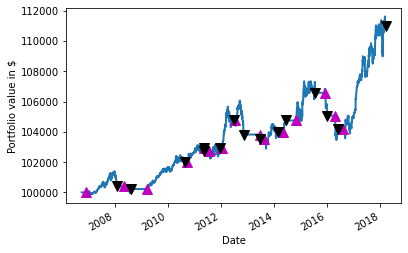

In [90]:
import matplotlib.pyplot as plt

fig = plt.figure()

ax1 = fig.add_subplot(111, ylabel='Portfolio value in $')

# Plot the equity curve in dollars
portfolio['total'].plot(ax=ax1, lw=2.)

# Plot the "buy" trades against the equity curve
ax1.plot(portfolio.loc[signals.positions == 1.0].index, 
         portfolio.total[signals.positions == 1.0],
         '^', markersize=10, color='m')

# Plot the "sell" trades against the equity curve
ax1.plot(portfolio.loc[signals.positions == -1.0].index, 
         portfolio.total[signals.positions == -1.0],
         'v', markersize=10, color='k')

# Show the plot
plt.show()

In [91]:
# Isolate the returns of your strategy
returns = portfolio['returns']

# annualized Sharpe ratio
sharpe_ratio = np.sqrt(252) * (returns.mean() / returns.std())

# Print the Sharpe ratio
print(sharpe_ratio)

0.6339232171626507


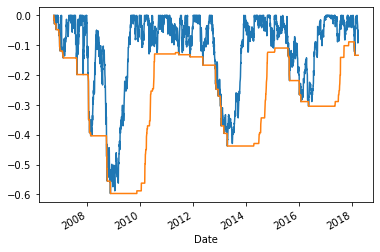

In [93]:
# Define a trailing 252 trading day window
window = 252

# Calculate the max drawdown in the past window days for each day
rolling_max = aapl['Adj. Close'].rolling(window, min_periods=1).max()
daily_drawdown = aapl['Adj. Close']/rolling_max - 1.0

# Calculate the minimum (negative) daily drawdown
max_daily_drawdown = daily_drawdown.rolling(window, min_periods=1).min()

# Plot the results
daily_drawdown.plot()
max_daily_drawdown.plot()

# Show the plot
plt.show()

In [95]:
# Get the number of days in `aapl`
days = (aapl.index[-1] - aapl.index[0]).days

# Calculate the CAGR 
cagr = ((((aapl['Adj. Close'][-1]) / aapl['Adj. Close'][1])) ** (365.0/days)) - 1

# Print CAGR
print(cagr)

0.284035510700825
